In [89]:
import surfepy

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer

In [125]:
np.random.seed = 100

In [126]:
view = LavaVuModelViewer()

2021-03-14 06:18:34,727 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-14 06:18:34,727 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-03-14 06:18:34,727 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.


In [127]:
xmin = 0
xmax = 5
ymin = 0
ymax = 5
nsteps = (10,10)
xx,yy = np.meshgrid(np.linspace(xmin,xmax,nsteps[0]),np.linspace(ymin,ymax,nsteps[1]))
zz1 =  0.2*np.sin(xx*10)+0.2*np.cos(yy)+0.15*np.random.random(xx.shape)#np.random.random(xx.shape)
vv = np.zeros(zz1.shape)
zz2 = np.zeros(xx.shape)+4
pts = np.vstack([
    np.vstack([xx.flatten(),yy.flatten(),zz1.flatten(),vv.flatten()]).T,
    np.vstack([xx.flatten(),yy.flatten(),zz2.flatten(),vv.flatten()+4]).T,
])
# data = pd.DataFrame()
print(pts.shape)

(200, 4)


In [128]:
data = pd.DataFrame(pts,columns=['X','Y','Z','val'])
data['nx'] = np.nan
data['ny'] = np.nan
data['nz'] = np.nan
data.loc[len(data),['X','Y','Z','nx','ny','nz']] = [2,2,4,0,0,1]

In [129]:
data['feature_name'] = 'test'

In [130]:
data

,X,Y,Z,val,nx,ny,nz,feature_name
0,0.000000,0.0,0.215778,0.0,NaN,NaN,NaN,test
1,0.555556,0.0,0.196574,0.0,NaN,NaN,NaN,test
2,1.111111,0.0,0.070490,0.0,NaN,NaN,NaN,test
3,1.666667,0.0,0.073337,0.0,NaN,NaN,NaN,test
4,2.222222,0.0,0.212019,0.0,NaN,NaN,NaN,test
...,...,...,...,...,...,...,...,...
196,3.333333,5.0,4.000000,4.0,NaN,NaN,NaN,test
197,3.888889,5.0,4.000000,4.0,NaN,NaN,NaN,test
198,4.444444,5.0,4.000000,4.0,NaN,NaN,NaN,test
199,5.000000,5.0,4.000000,4.0,NaN,NaN,NaN,test


In [131]:
bb=np.zeros((3,2))
bb[:,1] = 6.1
bb[:,0] = -1.1

model = GeologicalModel(bb[:,0],bb[:,1])
model.set_model_data(data)

model.create_and_add_foliation('test',
                               interpolatortype='PLI',
                               solver='pyamg')

In [132]:
model.create_and_add_foliation('test',interpolatortype='PLI',solver='pyamg')
view.model = model 



In [133]:
class zfeature:
    def __init__(self):
        self.name = 'Z'
    def evaluate_value(self,xyz):
#         print(xyz)
        return model.rescale(xyz)[:,2]
zpainter = zfeature()


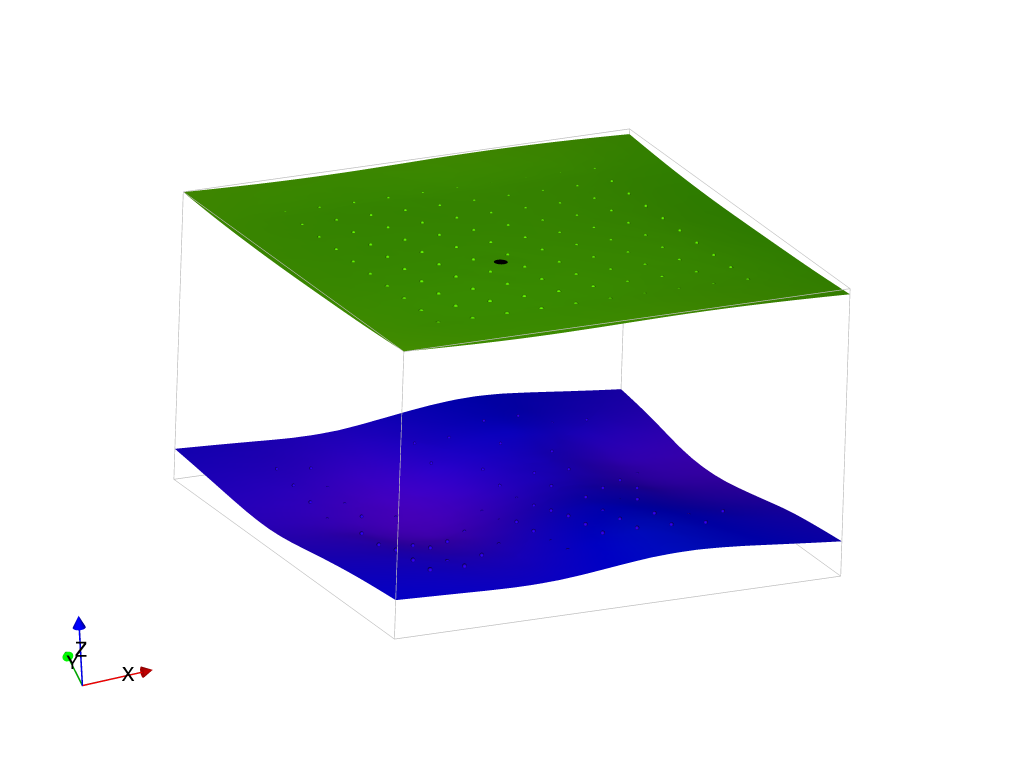

In [135]:
view.clear()
view.add_data(model.features[0])
view.add_isosurface(model.features[0],slices=[0,4],paint_with=zpainter,cmap='rainbow')
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]

view.display()


In [ ]:
images = []
view = LavaVuModelViewer(model)#@.clear()
# view.xmin = bb[0,0]
# view.ymin = bb[1,0]
# view.zmin = bb[2,0]
# view.xmax = bb[0,1]
# view.ymax = bb[1,1]
# view.zmax = bb[2,1]

# view.model=model
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
images.append(view.image_array())

view = LavaVuModelViewer(model)#@.clear()

view.add_data(model.features[0],cmap='rainbow')

view.add_isosurface(model.features[0],slices=[0,1,2,3,4],cmap='rainbow',paint_with=zpainter)
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
images.append(view.image_array())
model.create_and_add_foliation('test',interpolatortype='surfe',solver='pyamg',)
# view.clear()
# view.xmin = bb[0,0]
# view.ymin = bb[1,0]
# view.zmin = bb[2,0]
# view.xmax = bb[0,1]
# view.ymax = bb[1,1]
# view.zmax = bb[2,1]
# view.model=model
view = LavaVuModelViewer(model)
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.add_isosurface(model.features[0],slices=[0,1,2,3,4],cmap='rainbow',paint_with=zpainter)
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]

images.append(view.image_array())

model.create_and_add_foliation('test',interpolatortype='FDI',solver='pyamg')
# view.clear()
# view.xmin = bb[0,0]
# view.ymin = bb[1,0]
# view.zmin = bb[2,0]
# view.xmax = bb[0,1]
# view.ymax = bb[1,1]
# view.zmax = bb[2,1]
# view.model=model
view = LavaVuModelViewer(model)
# view.add_isosurface(model.features[0],slices=[0,4],cmap='viridis',paint_with=model.features[0])
view.add_data(model.features[0],cmap='rainbow')
view.add_isosurface(model.features[0],slices=[0,1,2,3,4],cmap='rainbow',paint_with=zpainter)
view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]

images.append(view.image_array())

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,15))
ax[0][0].imshow(images[0])
ax[0][0].set_title('A. Data')
ax[0][1].imshow(images[1])
ax[0][1].set_title('B. PLI')

ax[1][0].imshow(images[3])
ax[1][0].set_title('C. FDI')

ax[1][1].imshow(images[2])
ax[1][1].set_title('D. Surfe')
for i in range(2):
    for j in range(2):
        ax[i][j].axis('off')
plt.tight_layout()

### Look at regularisation value

In [123]:

images = {}
images['PLI'] = {}
images['FDI'] = {}
images['surfe'] = {}
for interpolator  in images.keys():
    for regularisation in [0.1,0.5,1.,1.5]:
        view.clear()
        view.model=model
        view.add_data(model.features[0],cmap='viridis')
        model.create_and_add_foliation('test',
                                       interpolatortype=interpolator,
                                       regularisation=regularisation,
                                       regression_smoothing=regularisation,
                                       solver='pyamg',)
        view.add_isosurface(model.features[0],slices=[0,4],cmap='rainbow',paint_with=zpainter)
        view.rotation = [-67.69232940673828, 25.18480110168457, 8.032236099243164]
        images[interpolator][regularisation] = view.image_array()


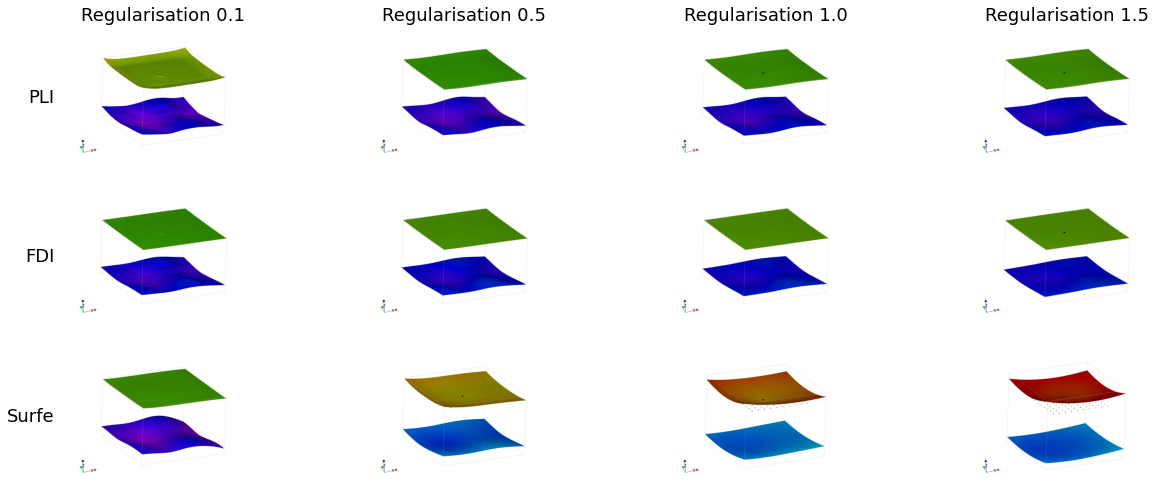

In [124]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
plt.rcParams.update({'font.size': 15})


cols = ['Regularisation {}'.format(col) for col in images['PLI'].keys()]
rows = ['{}'.format(row) for row in ['PLI', 'FDI','Surfe']]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(21, 7))
# plt.setp(axes.flat, xlabel='X-label', ylabel='Y-label')
i=0
for k, v in images['PLI'].items():
    axes[0,i].get_xaxis().set_ticks([])
    axes[0,i].get_yaxis().set_ticks([])
    axes[0,i].spines['top'].set_visible(False)
    axes[0,i].spines['right'].set_visible(False)
    axes[0,i].spines['bottom'].set_visible(False)
    axes[0,i].spines['left'].set_visible(False)
    axes[0,i].imshow(v)
#     axes[0,i].axis('off')
#     ax[0,i].set_title('Regularisation {}'.format(k),size='xx-large')
    i+=1

i = 0
for k, v in images['FDI'].items():
    axes[1,i].get_xaxis().set_ticks([])
    axes[1,i].get_yaxis().set_ticks([])
    axes[1,i].spines['top'].set_visible(False)
    axes[1,i].spines['right'].set_visible(False)
    axes[1,i].spines['bottom'].set_visible(False)
    axes[1,i].spines['left'].set_visible(False)
    axes[1,i].imshow(v)
    i+=1
i=0
for k, v in images['surfe'].items():
    axes[2,i].get_xaxis().set_ticks([])
    axes[2,i].get_yaxis().set_ticks([])
    axes[2,i].spines['top'].set_visible(False)
    axes[2,i].spines['right'].set_visible(False)
    axes[2,i].spines['bottom'].set_visible(False)
    axes[2,i].spines['left'].set_visible(False)
    axes[2,i].imshow(v)
#     axes[1,i].axis('off')

    i+=1
pad = 5 # in points

for ax, col in zip(axes[0], cols):
    
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()
# tight_layout doesn't take these labels into account. We'll need 
# to make some room. These numbers are are manually tweaked. 
# You could automatically calculate them, but it's a pain.
fig.subplots_adjust(left=0.15, top=0.95)

plt.show()